# Presentación

## Trabajo Práctico 1 : Reservas de Hotel

### Grupo 01 - Integrantes:
        Cabrera Rodríguez, Mateo 
        Gonzalez Alejo, Camila
        Bocanegra, Eduardo Martín

## Setup

### Instalar dependencias

In [1]:
pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Cargar bibliotecas

In [1]:
#Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Modelo Lineal
from sklearn.linear_model import LinearRegression

#Metricas para evaluar modelos
from sklearn import metrics

### Cargar Dataset

In [2]:
hoteles_ds = pd.read_csv('../datasets/hotels_train.csv')

## Checkpoint 1

### Exploración inicial de datos

In [3]:
hoteles_ds.head()

hotel  lead_time  arrival_date_year arrival_date_month  \
0    City Hotel         49               2016          September   
1  Resort Hotel          4               2015            October   
2    City Hotel         25               2016            October   
3    City Hotel         26               2016           December   
4    City Hotel        104               2017              March   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        37                          5   
1                        44                         31   
2                        42                         13   
3                        51                         12   
4                        12                         19   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        1                     2       1       0.0  ...   
1                        0                     1       2       0.0  ...   
2                        0                     1       2       2.0  ...   
3                        2                     5       2       0.0  ...   
4                        2                     5       2       0.0  ...   

   company days_in_waiting_list    customer_type    adr  \
0      NaN                    0        Transient  115.5   
1      NaN                    0        Transient   42.0   
2      NaN                    0        Transient  229.0   
3      NaN                    0        Transient   75.0   
4      NaN                    0  Transient-Party   75.0   

  required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                           0                          1            Canceled   
1                           1                          0           Check-Out   
2                           0                          2           Check-Out   
3                           0                          0            Canceled   
4                           0                          1           Check-Out   

   reservation_status_date                                    id is_canceled  
0               2016-08-25  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689           1  
1               2015-11-01  b1428f80-c56c-4ae4-91a9-6962edae08b1           0  
2               2016-10-14  2226c018-ea20-4c4e-8f71-ea66aee70d7c           0  
3               2016-11-29  314f56dc-2e4d-4298-9bdd-27bb008bffff           1  
4               2017-03-26  28c75445-c603-413a-babf-ad377018b592           0  

[5 rows x 33 columns]

In [4]:
hoteles_ds.shape

(61913, 33)

In [53]:
# Separamos variables categoricas y numericas
variables_categoricas = []
variables_numericas = []
for col in hoteles_ds.columns:
    if hoteles_ds[col].dtype == 'object':
        variables_categoricas.append(col)
    elif(set(hoteles_ds[col].unique()) == set([0,1])): #variables en la que los numeros representan un booleano:
            variables_categoricas.append(col)
    else:
        variables_numericas.append(col)

# Vemos que algunas variables en nuestra lista de numericas son categoricas y corregimos las listas

#variables en las que los numeros representan categorias:
variables_categoricas += ['agent', 'company']
variables_numericas.remove('agent')
variables_numericas.remove('company')



print('Variables Categoricas: ', variables_categoricas)
print('Variables Numericas: ', variables_numericas)

variables_enteras = []
variables_float = []
for var in variables_numericas:
    if hoteles_ds[var].dtype == 'int64':
        variables_enteras.append(var)
    else:
        variables_float.append(var)

# Vamos que la columna 'children' es una variable entera pero tiene tipo float, hacemos el cambio
hoteles_ds['children'] = hoteles_ds['children'].astype('int64')
variables_enteras.append('children')
variables_float.remove('children')

print('Variables enteras: ', variables_enteras)
print('Variables float: ', variables_float)


Variables Categoricas:  ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status_date', 'id', 'is_canceled', 'agent', 'company']
Variables Numericas:  ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Variables enteras:  ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'chi

##### Separacion de filas sospechosas


Extraccion de los casos en los que hay habitaciones sin adultos

In [ ]:
rooms_without_adults = hoteles_ds.loc[hoteles_ds['adults'] < 1]
rooms_without_adults

hotel  lead_time  arrival_date_year arrival_date_month  \
96     City Hotel         23               2016                May   
212    City Hotel        315               2017               July   
270    City Hotel          4               2017           February   
326    City Hotel         53               2016           November   
464    City Hotel         64               2015            October   
...           ...        ...                ...                ...   
59982  City Hotel         44               2016           February   
60837  City Hotel         33               2017                May   
60994  City Hotel         11               2016             August   
61003  City Hotel         57               2016           November   
61298  City Hotel         40               2016            January   

       arrival_date_week_number  arrival_date_day_of_month  \
96                           21                         21   
212                          27                          7   
270                           8                         21   
326                          49                         29   
464                          42                         16   
...                         ...                        ...   
59982                         7                          8   
60837                        19                          9   
60994                        34                         19   
61003                        46                          9   
61298                         3                         14   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
96                           2                     4       0       2.0  ...   
212                          0                     1       0       2.0  ...   
270                          0                     3       0       0.0  ...   
326                          0                     4       0       2.0  ...   
464                          2                     3       0       0.0  ...   
...                        ...                   ...     ...       ...  ...   
59982                        1                     3       0       2.0  ...   
60837                        0                     1       0       0.0  ...   
60994                        0                     1       0       2.0  ...   
61003                        0                     2       0       0.0  ...   
61298                        0                     3       0       2.0  ...   

       company days_in_waiting_list    customer_type     adr  \
96         NaN                    0        Transient  128.49   
212        NaN                    0        Transient   91.85   
270        NaN                    0  Transient-Party    0.00   
326        NaN                    0        Transient   77.86   
464        NaN                    0  Transient-Party    0.00   
...        ...                  ...              ...     ...   
59982      NaN                    0  Transient-Party   66.50   
60837      NaN                    0        Transient  200.00   
60994      NaN                    0        Transient  127.60   
61003      NaN                    0        Transient  165.38   
61298      NaN                    0        Transient    6.00   

      required_car_parking_spaces  total_of_special_requests  \
96                              0                          0   
212                             0                          2   
270                             0                          0   
326                             0                          2   
464                             0                          0   
...                           ...                        ...   
59982                           0                          1   
60837                           0                          0   
60994                           0                          1   
61003                           0                          2   
6129

### Visualización de los datos

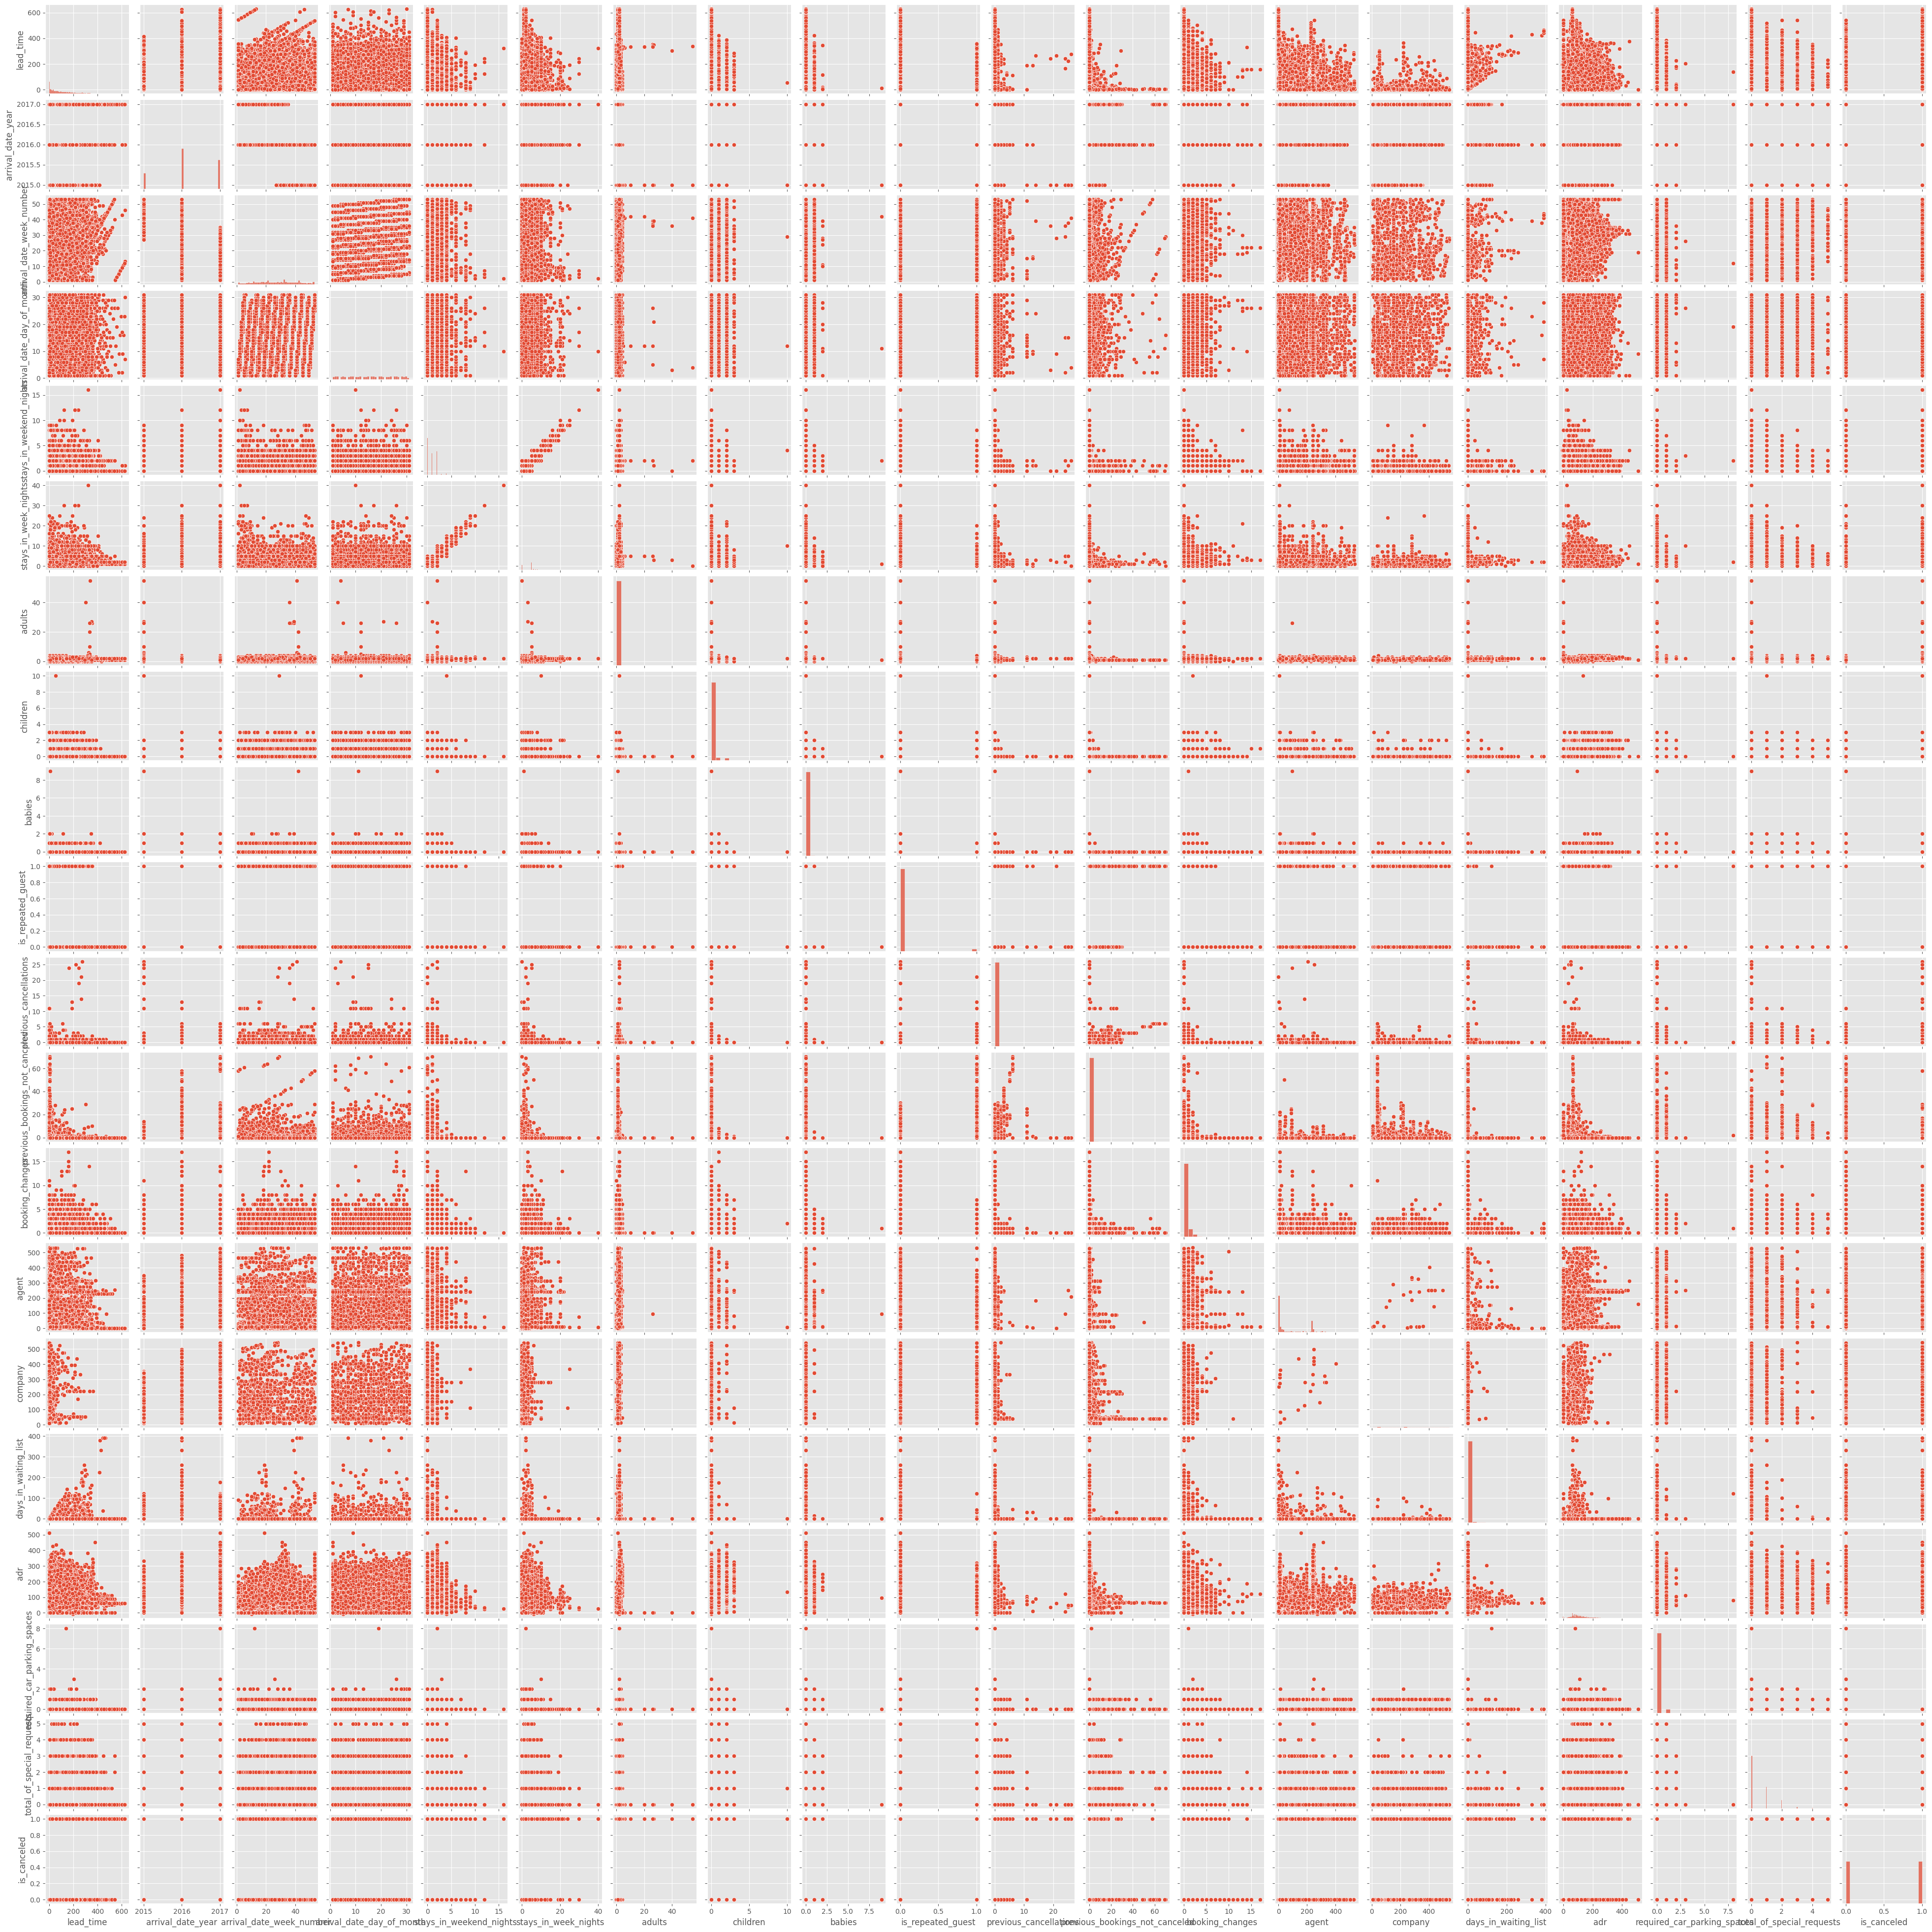

In [5]:
sns.pairplot(hoteles_ds, height=2)

Cálculo de correlaciones

C:\Users\digix\AppData\Local\Temp\ipykernel_1052\2861176130.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = hoteles_ds.corr(method='pearson')


<Axes: >

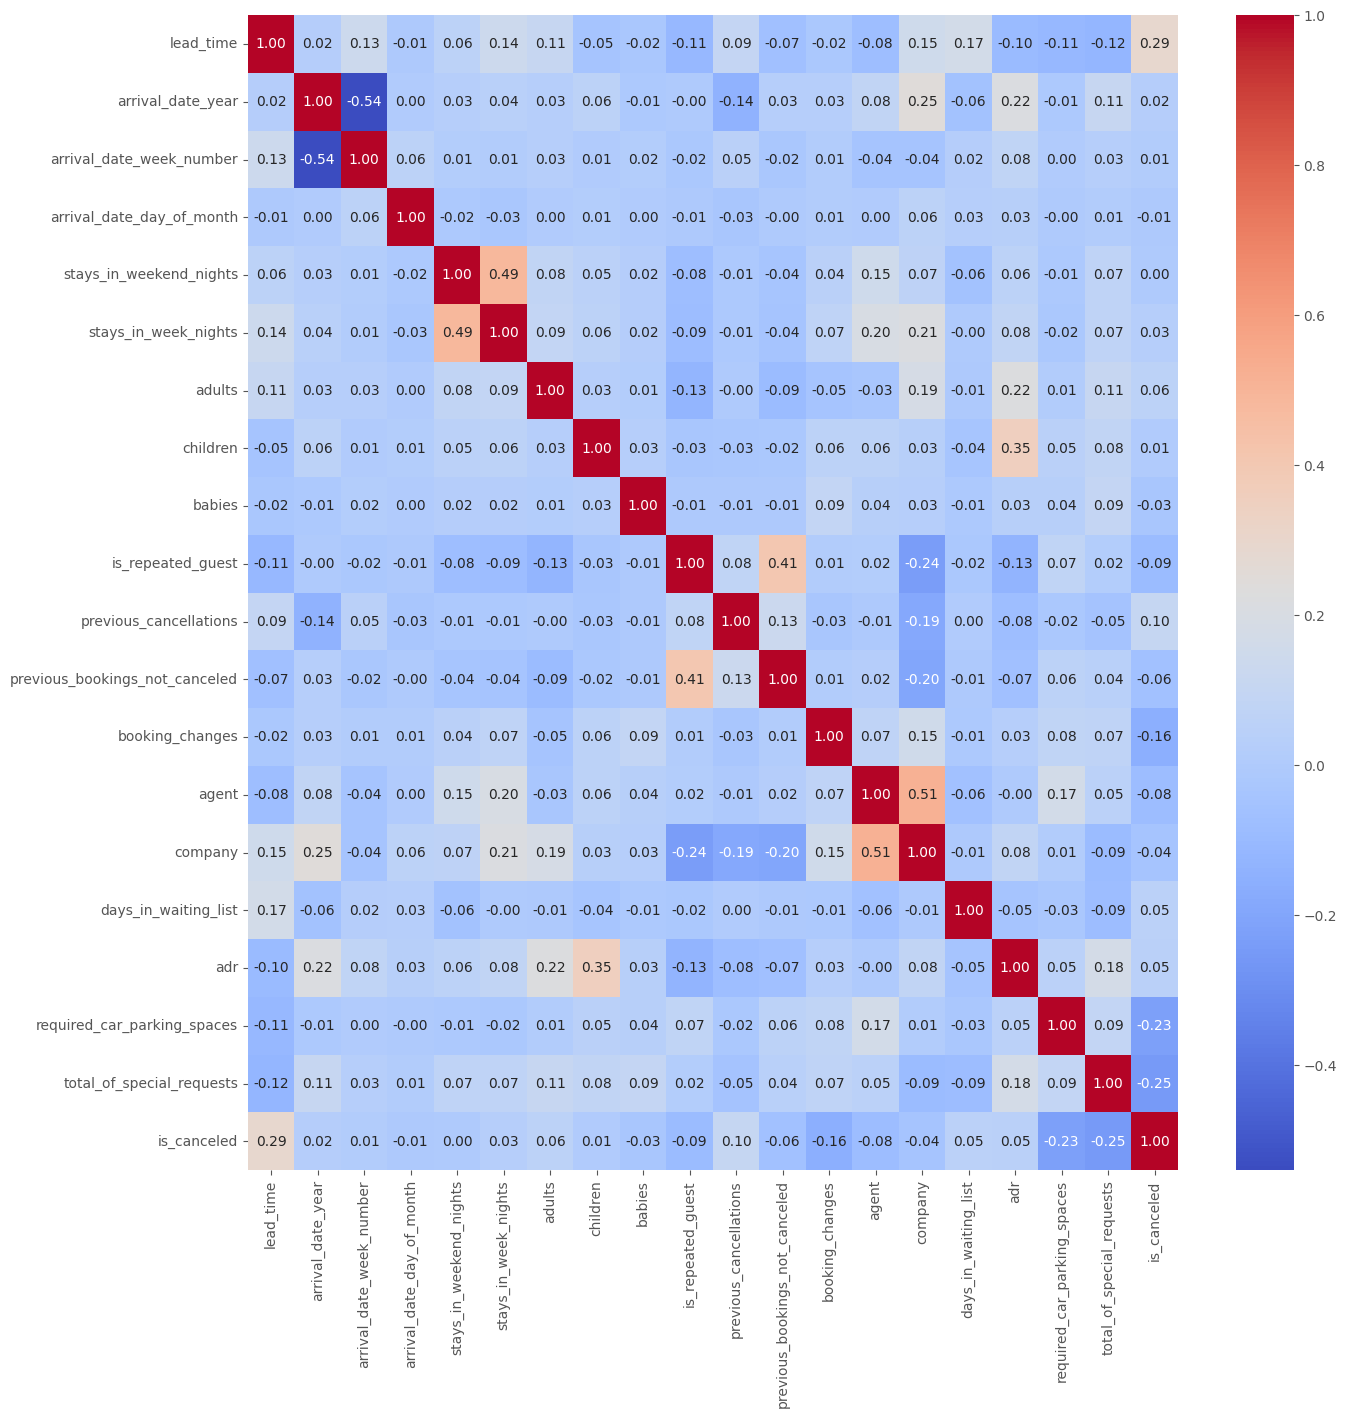

In [59]:
#calculo el indice de correlacion de pearson para todas las variables y graficos con un heatmap
corr = hoteles_ds.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')


C:\Users\digix\AppData\Local\Temp\ipykernel_1052\1202153640.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hoteles_ds.corr()[['is_canceled']].sort_values(by='is_canceled', ascending=False), annot=True, cmap='coolwarm')


<Axes: >

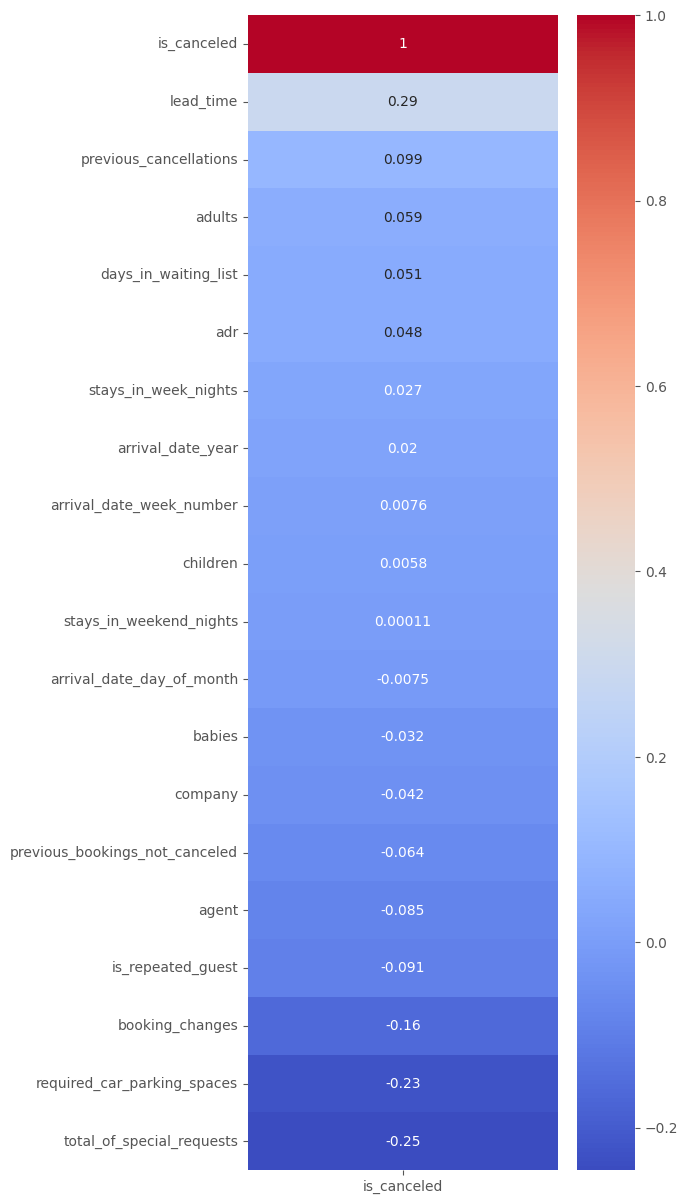

In [64]:
#analizamos la relacion entre las variables y el target
plt.figure(figsize=(5,15))
sns.heatmap(hoteles_ds.corr()[['is_canceled']].sort_values(by='is_canceled', ascending=False), annot=True, cmap='coolwarm')


Obvservación de la relación entre el tiempo de anticipación y el estado de cancelación.

<Axes: xlabel='is_canceled', ylabel='lead_time'>

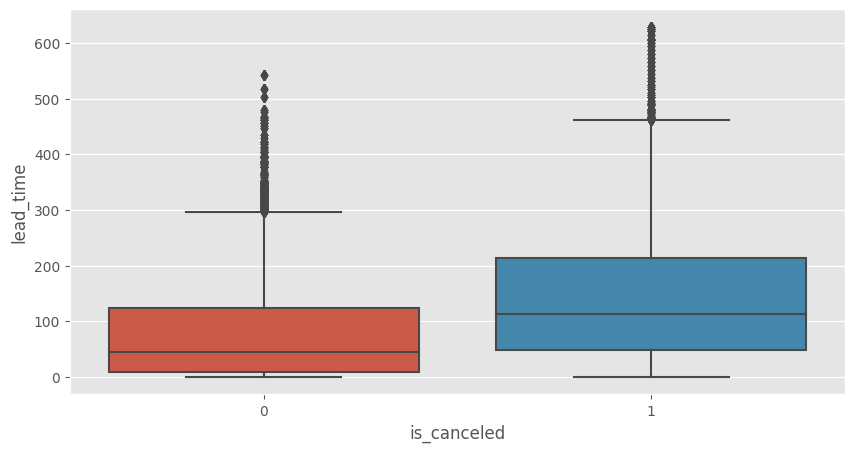

In [69]:
plt.figure(figsize=(10,5))
sns.boxplot(x='is_canceled', y='lead_time', data=hoteles_ds)

Observación de la relacion entre la cantidad de pedidos especiales y el estado de la cancelación.

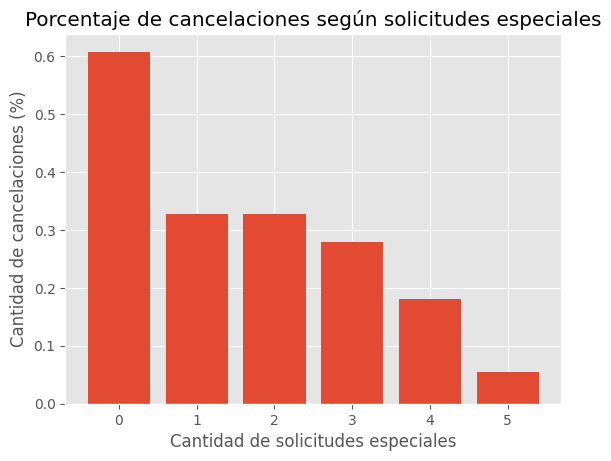

In [87]:
cancelations_by_amount_of_special_requests = hoteles_ds.groupby('total_of_special_requests')['is_canceled'].sum()
reservations_by_amount_of_special_requests = hoteles_ds.groupby('total_of_special_requests')['hotel'].count()
x = [i for i in range(0,6)]
y = [cancelations_by_amount_of_special_requests[i]/reservations_by_amount_of_special_requests[i] for i in x]

plt.bar(x, y)
plt.title('Porcentaje de cancelaciones según solicitudes especiales')
plt.xlabel('Cantidad de solicitudes especiales')
plt.ylabel('Cantidad de cancelaciones (%)')
plt.show()

Observación de la relacion entre la cantidad de lugares en el estacionamiento y el estado de la cancelación.

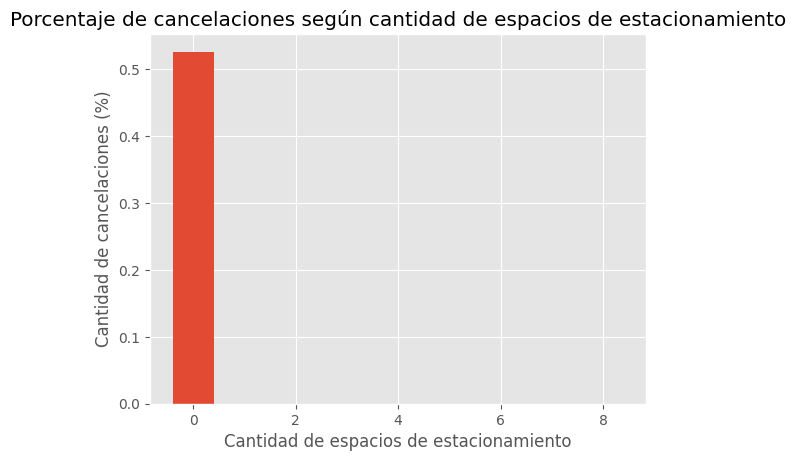

In [96]:
cancelations_by_amount_of_special_requests = hoteles_ds.groupby('required_car_parking_spaces')['is_canceled'].sum()
reservations_by_amount_of_special_requests = hoteles_ds.groupby('required_car_parking_spaces')['hotel'].count()
x = [0,1,2,3,8]
y = [cancelations_by_amount_of_special_requests[i]/reservations_by_amount_of_special_requests[i] for i in x]

plt.bar(x, y)
plt.title('Porcentaje de cancelaciones según cantidad de espacios de estacionamiento')
plt.xlabel('Cantidad de espacios de estacionamiento')
plt.ylabel('Cantidad de cancelaciones (%)')
plt.show()

Observacion de cantidad de cancelaciones por mes, de cada hotel


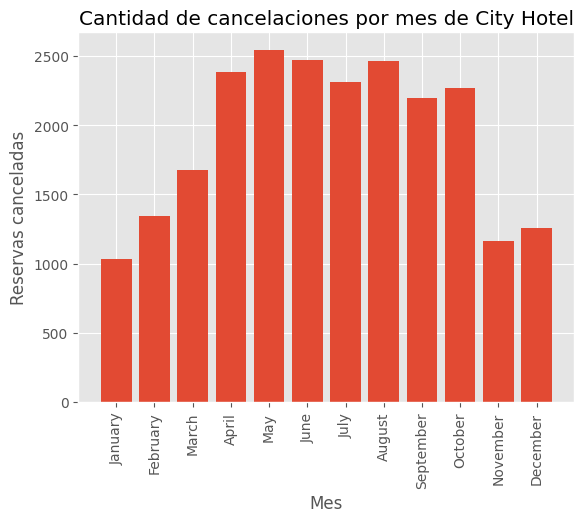

In [29]:
cancelations_by_month = hoteles_ds[hoteles_ds['hotel'] == 'City Hotel'].groupby('arrival_date_month')['is_canceled'].sum()
x = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
y = [cancelations_by_month[mes] for mes in x]
plt.bar(x, y)
plt.xticks(rotation=90)
plt.title('Cantidad de cancelaciones por mes de City Hotel')
plt.xlabel('Mes')
plt.ylabel('Reservas canceladas')
plt.show()

Vemos que hay una grande variación, pero tal vez se debe al número de reservas por cada mes. Para eliminar esa variable del gráfico, vamos a graficar el porcentaje de las reservas que fueron canceladas cada mes:

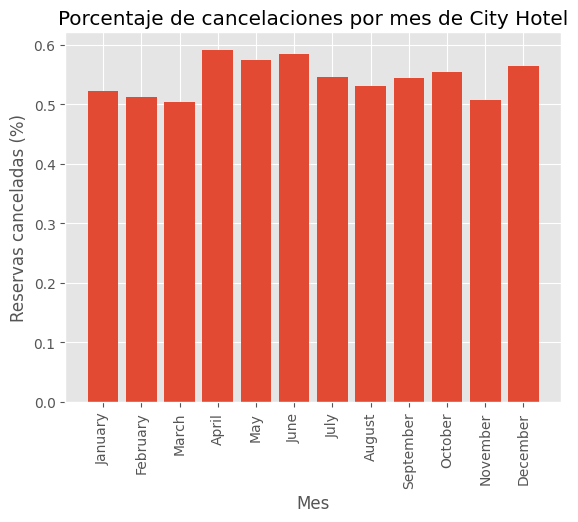

In [30]:
reservations_by_month = hoteles_ds[hoteles_ds['hotel'] == 'City Hotel'].groupby('arrival_date_month')['hotel'].count()
x = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
y = [cancelations_by_month[mes]/reservations_by_month[mes] for mes in x]
plt.bar(x, y)
plt.xticks(rotation=90)
plt.title('Porcentaje de cancelaciones por mes de City Hotel')
plt.xlabel('Mes')
plt.ylabel('Reservas canceladas (%)')
plt.show()

Hacemos lo mismo para el Resort Hotel:

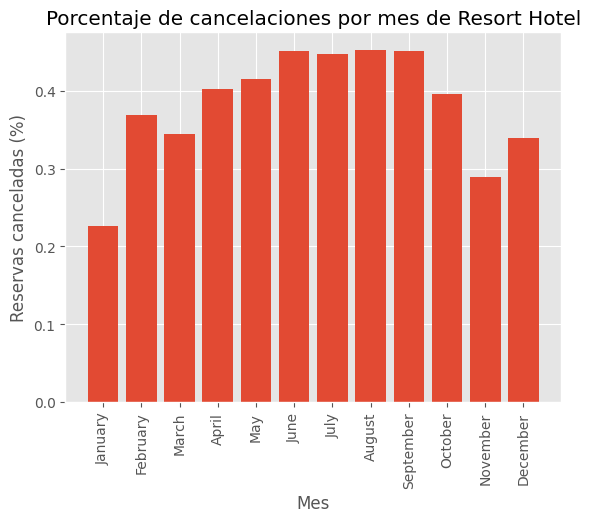

In [31]:
cancelations_by_month = hoteles_ds[hoteles_ds['hotel'] == 'Resort Hotel'].groupby('arrival_date_month')['is_canceled'].sum()
reservations_by_month = hoteles_ds[hoteles_ds['hotel'] == 'Resort Hotel'].groupby('arrival_date_month')['hotel'].count()
x = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
y = [cancelations_by_month[mes]/reservations_by_month[mes] for mes in x]
plt.bar(x, y)
plt.xticks(rotation=90)
plt.title('Porcentaje de cancelaciones por mes de Resort Hotel')
plt.xlabel('Mes')
plt.ylabel('Reservas canceladas (%)')
plt.show()

Obeservacion de cancelaciones por anio

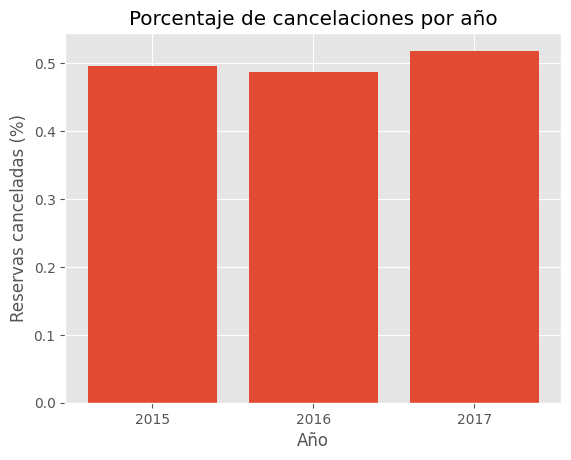

In [32]:

cancelations_by_year = hoteles_ds.groupby('arrival_date_year')['is_canceled'].sum()
reservations_by_year = hoteles_ds.groupby('arrival_date_year')['hotel'].count()
x = ['2015', '2016', '2017']
y = [cancelations_by_year[int(anio)]/reservations_by_year[int(anio)] for anio in x]
plt.bar(x, y)
plt.title('Porcentaje de cancelaciones por año')
plt.xlabel('Año')
plt.ylabel('Reservas canceladas (%)')
plt.show()

Los 30 paises que mas cancelan

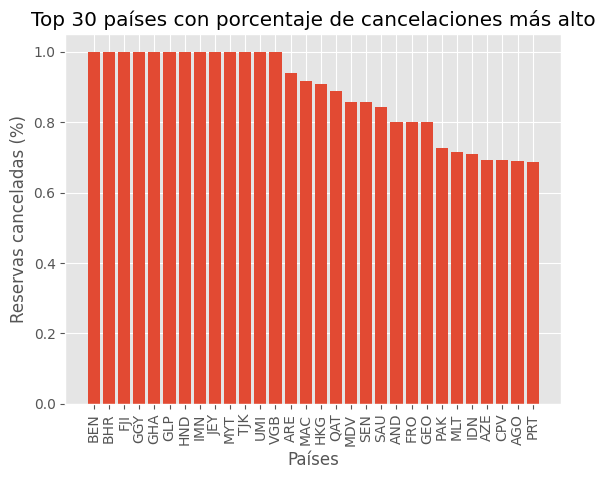

In [47]:
cancelations_by_country = hoteles_ds.groupby('country')['is_canceled'].sum().sort_values(ascending=False)
reservations_by_country = hoteles_ds.groupby('country')['hotel'].count().sort_values(ascending=False)
porcentaje_cancelaciones = cancelations_by_country/reservations_by_country
porcentaje_cancelaciones = sorted(porcentaje_cancelaciones.items(), key=lambda x: x[1], reverse=True)
#grafico las 30 mas altas
x = [pais[0] for pais in porcentaje_cancelaciones[:30]]
y = [pais[1] for pais in porcentaje_cancelaciones[:30]]

plt.bar(x, y)
plt.xticks(rotation=90)
plt.title('Top 30 países con porcentaje de cancelaciones más alto')
plt.xlabel('Países')
plt.ylabel('Reservas canceladas (%)')
plt.show()


Grafico de cancelaciones depende la cantidad de bebes que tengan

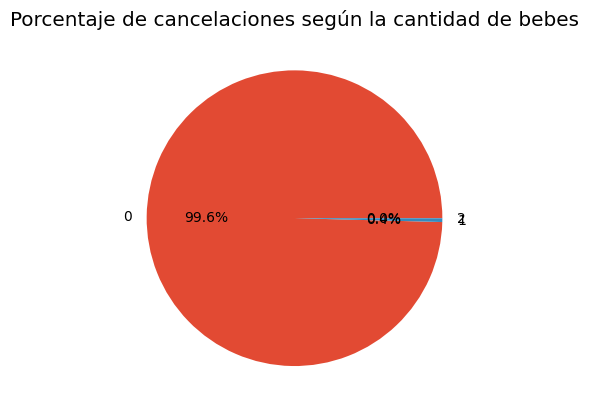

In [ ]:
babies_df = hoteles_ds['babies']
cancel_babies = hoteles_ds[hoteles_ds['is_canceled'] == 1]['babies'].value_counts()
cancel_babies_perc = cancel_babies / len(babies_df) * 100

# Grafico
labels = cancel_babies_perc.index.astype(str)
plt.pie(cancel_babies_perc, labels=labels, autopct='%1.1f%%')
plt.title('Porcentaje de cancelaciones según la cantidad de bebes')
plt.show()


### Datos Faltantes

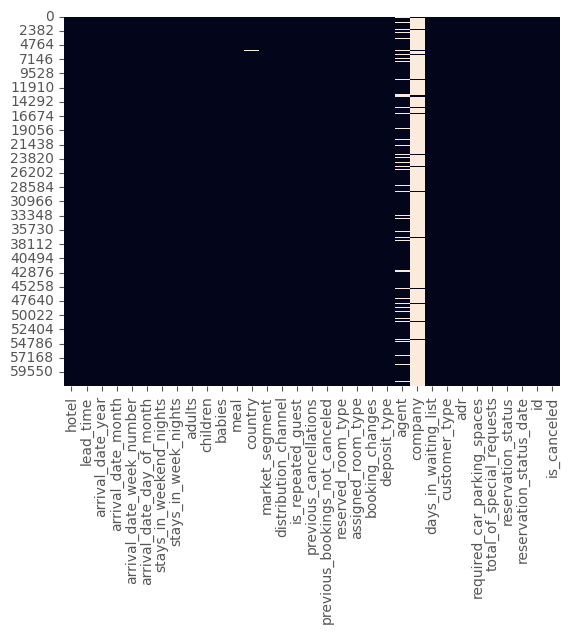

In [6]:
sns.heatmap(hoteles_ds.isnull(), cbar=False)
plt.show()

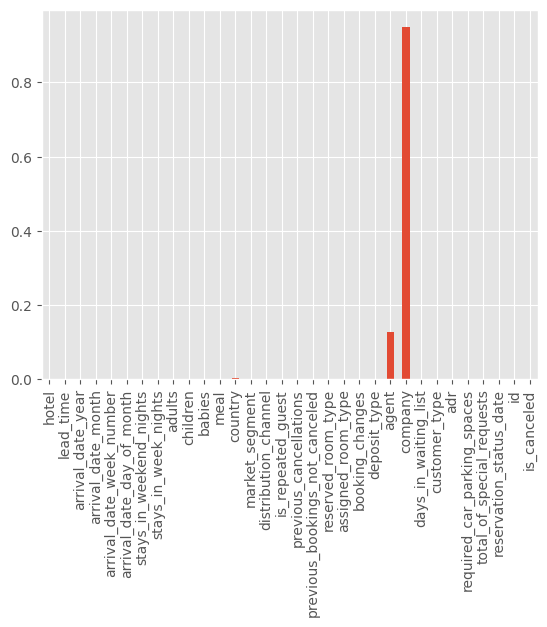

children: 4 variables faltantes. 0.01%
country: 221 variables faltantes. 0.36%
agent: 7890 variables faltantes. 12.74%
company: 58761 variables faltantes. 94.91%


In [5]:
hoteles_ds.isnull().mean().plot(kind='bar')
plt.show()

Observacion del numero exacto de nulos por columna


In [56]:
vars_with_na = [var for var in hoteles_ds.columns if hoteles_ds[var].isnull().sum() > 0]
for var in vars_with_na:
    print(f"{var}: {hoteles_ds[var].isnull().sum()} variables faltantes. {np.round(hoteles_ds[var].isnull().mean() * 100, 2)}%")

filas_incompletas = hoteles_ds.loc[hoteles_ds['country'].isnull() | hoteles_ds['children'].isnull()].shape[0] / hoteles_ds.shape[0] * 100

agent: 7744 variables faltantes. 12.55%
company: 58608 variables faltantes. 95.01%


Eliminacion de nulos en Country y Children porque no son un porcentaje significativo en el total de datos y consideramos importante para su estudio esos datos

In [48]:
hoteles_ds.dropna(subset=['children', 'country'], inplace=True)


### Valores Atipicos

Chequeo de respuestas a cantidad de bebes

In [99]:
num_babies = hoteles_ds['babies'].value_counts()
num_babies

0    61260
1      420
2        7
9        1
Name: babies, dtype: int64

Chequeo respuestas a cantidad de niños

In [54]:
num_children = hoteles_ds['children'].value_counts()
num_children

0     57238
1      2455
2      1955
3        39
10        1
Name: children, dtype: int64

Chequeo respuestas a cantidad de adultos

In [ ]:
num_adults = hoteles_ds['adults'].value_counts()
num_adults

2     46962
1     11549
3      3164
0       197
4        30
26        3
5         2
40        1
20        1
6         1
10        1
27        1
55        1
Name: adults, dtype: int64